In [1]:
from hossam import load_data, my_dpi
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from scipy.spatial import ConvexHull

In [2]:
origin=load_data('game_usage')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

게임 이용시간(time spent)과 레벨(game level)에 대한 가상 데이터

===== 데이터 크기 확인 =====
데이터셋 크기 : (100, 2)
행 개수 : 100개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time spent  100 non-null    int64
 1   game level  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB
None


,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


In [3]:
scaler=StandardScaler()
df1=DataFrame(scaler.fit_transform(origin), columns=origin.columns)
df1.head()

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652


In [4]:
estimator=DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
estimator.fit(df1)

cluster=estimator.labels_
cluster

array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0])

In [5]:
df2=df1.copy()
df2['cluster']=cluster
df2.head()

,time spent,game level,cluster
0,-0.250733,1.474805,0
1,0.326494,0.606546,0
2,-0.611500,0.795456,0
3,0.470801,1.674613,0
4,-1.405187,-1.558652,1


In [6]:
estimator.core_sample_indices_

array([ 1,  2,  4,  5,  7,  8,  9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 55, 57, 58, 60, 61, 62,
       63, 64, 65, 66, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99])

In [8]:
df3=df2.copy()
df3['vector']='border'
df3.loc[estimator.core_sample_indices_, 'vector']='core'
df3.loc[df3['cluster']==-1, 'vector']='noise'
df3.head()

,time spent,game level,cluster,vector
0,-0.250733,1.474805,0,border
1,0.326494,0.606546,0,core
2,-0.611500,0.795456,0,core
3,0.470801,1.674613,0,border
4,-1.405187,-1.558652,1,core


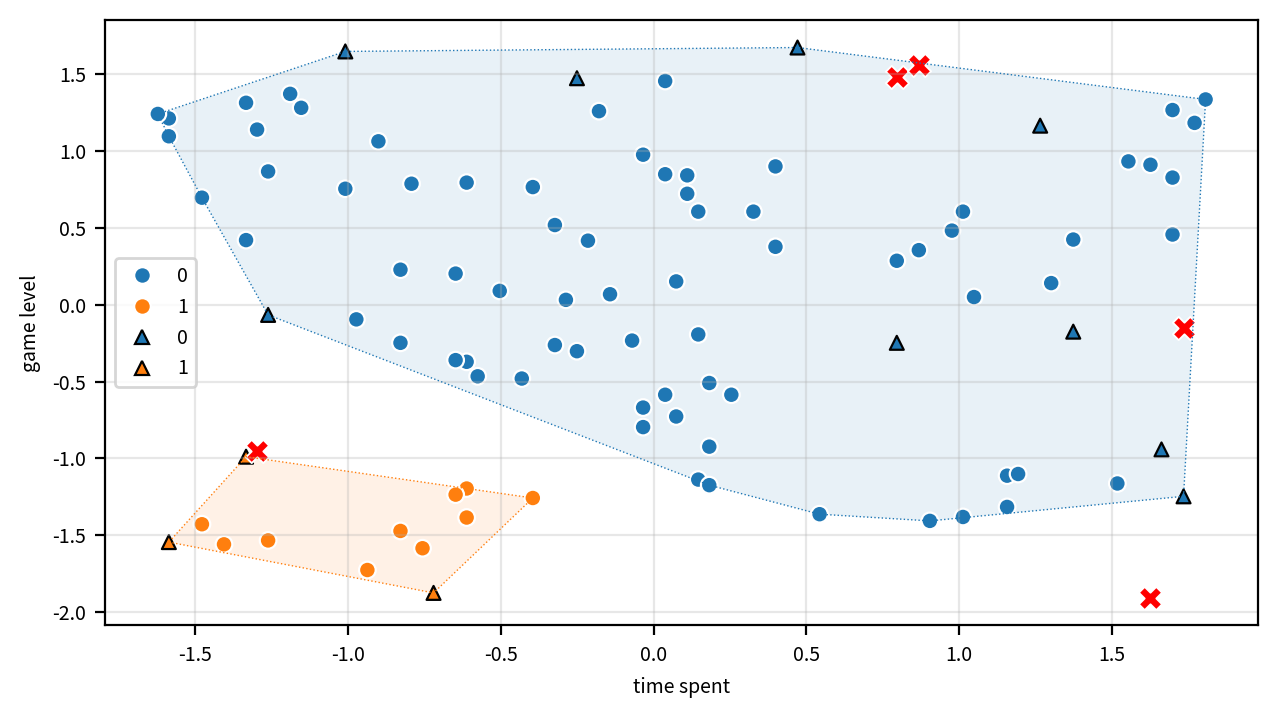

In [17]:
vdf=df3.copy()
hue_field='cluster'
x_field='time spent'
y_field='game level'

width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in vdf[hue_field].unique():
    if c==-1:
        continue
    df_c=vdf.loc[vdf[hue_field]==c, [x_field, y_field]]
    try:
        # 외곽선 좌표 계산
        hull=ConvexHull(df_c)
        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points=np.append(hull.vertices, hull.vertices[0])
        ax.plot(df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

sb.scatterplot(data=vdf[(vdf[hue_field]!=-1)&(vdf['vector']=='core')], x=x_field, y=y_field, hue=hue_field, edgecolor='white', linewidth=0.8)
sb.scatterplot(data=vdf[(vdf[hue_field]!=-1)&(vdf['vector']=='border')], x=x_field, y=y_field, hue=hue_field, marker='^', s=25, edgecolor='#000', linewidth=0.8)
sb.scatterplot(data=vdf[vdf['vector']=='noise'], x=x_field, y=y_field, color="#FF0000", marker='X', s=70)

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()